In [8]:
import warnings
warnings.filterwarnings('ignore')

# Logistic Regression Analysis with Python

## **1. Introduction to Logistic Regression**
Logistic regression is a statistical method for modeling the relationship between a binary dependent variable and one or more independent variables. It predicts the probability that a given observation falls into one of two categories.

The logistic function (sigmoid function) maps predicted values to a range between 0 and 1:

In [4]:
from IPython.display import display, Math

display(Math(r"\sigma(z) = \frac{1}{1 + e^{-z}}"))

display(Math(r"\text{where: } z = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n."))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## **2. Exploratory Data Analysis (EDA)**
- Overview of the dataset.
- Checking for missing values.
- Visualizing relationships between variables and the target.
- Understanding class imbalance.

In [5]:
# Example: Load data and check for missing values
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Check for missing values
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


## **3. Logistic Regression Assumptions**
- **Binary dependent variable**: The target variable must be binary.
- **Independence**: Observations must be independent of each other.
- **Linearity in log-odds**: Independent variables should have a linear relationship with the log-odds of the dependent variable.
- **No multicollinearity**: Independent variables should not be highly correlated.

## **4. Model Fitting**
1. Splitting the dataset into training and testing sets.
2. Fitting a logistic regression model using scikit-learn.
3. Evaluating the model using metrics like accuracy, precision, recall, and ROC-AUC.

In [9]:
# Example: Fitting a Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Split the data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## **5. Interpreting Results**
- **Coefficients**: Indicate the log-odds change in the dependent variable for a one-unit change in the independent variable.
- **Odds Ratio**: Exponentiating the coefficients provides the odds ratio.
- **Model Performance**: Metrics like precision, recall, and ROC-AUC help assess the model's effectiveness.

## **6. Cross-Validation**
- Perform k-fold cross-validation to assess model robustness.
- Average the performance metrics across folds to get a reliable estimate.

In [10]:
# Example: Cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f'Mean ROC-AUC: {scores.mean():.2f}')

Mean ROC-AUC: 0.99


## **7. Handling Class Imbalance**
- Techniques like oversampling, undersampling, or using class weights can address imbalanced datasets.
- Synthetic data generation (e.g., SMOTE) is another option.

## **8. Visualizing Results**
- Plotting the ROC curve to evaluate the model's discriminative power.
- Confusion matrix for a detailed performance overview.

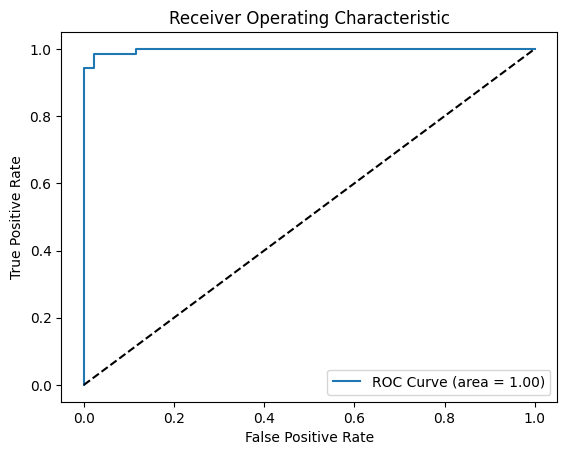

In [11]:
# Example: ROC Curve
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()